<h1 style = "text-align:center"> Chatbot Keragaman Budaya di Indonesia </h1>
<img src = https://www.ayoksinau.com/keanekaragaman-budaya-indonesia/max/800/1*SAHhdvu3v9l81OjsfBa_Yw.jpeg" />

Cultural Chatbot adalah chatbot yang membantu kita untuk mengetahui berbagai macam budaya yang ada di berbagai wilayah di Indonesia

Download dataset disini https://drive.google.com/file/d/1Oqrf2q_5c1jFZebczvgbCipQdIay-7wY/view?usp=sharing


<h2>Libraries</h2>
Library inti yang digunakan dalam pembuatan chatbot ini adalah tensorflow2, keras, numpy, dan pandas

In [ ]:
#import library

import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
#mencari dataset yang tersimpan di google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = "/content/drive/MyDrive/contentfinal.json"

In [ ]:
#importing the dataset
with open('/content/drive/MyDrive/chatboot1/content222.json') as content:
  data1 = json.load(content)

<h2> Import Data </h2>

Data disimpan dalam file json yang dapat diimpor dan digunakan sebagai kerangka data pandas. Data ini dibuat secara manual oleh kami. Karenanya, itu tidak terlalu besar.<br>
Kita semua tahu bahwa pembelajaran mendalam membutuhkan banyak data. tapi, itu tidak terjadi di sini. Kami telah menggunakan arsitektur jaringan saraf yang cukup kuat untuk menangani sejumlah kecil data ini

In [ ]:
#mendapatkan semua data ke daftar


tags = []
inputs = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['respon']
  for lines in intent['input']:
    inputs.append(lines)
    tags.append(intent['tag'])

In [ ]:
#mengonversi ke kerangka data

data = pd.DataFrame({"inputs":inputs,
                     "tags":tags})

In [ ]:
#mencetak data

data

,inputs,tags
0,Halo,Salam
1,Hai,Salam
2,Hola,Salam
3,Wassap,Salam
4,Yuhuu,Salam
...,...,...
730,Selamat tinggal,Penutup
731,Terima kasih infonya,Penutup
732,Sampai jumpa lagi,Penutup
733,Terima kasih informasinya,Penutup


In [ ]:
#mendeteksi dataset

data = data.sample(frac=1)

<h2> Pre-Processing </h2>

Pre-processing penting dilakukan untuk menghapus tanda baca, mengubah ke huruf kecil, dan menyelesaikan pengkodean data tekstual ke data numerik

In [ ]:
#menghapus tanda baca

import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
705,apa itu gulai ikan patin,seni tari Jawa Barat
490,suku apa yang mendominasi di jawa timur,Suku mendominasi
659,apa itu blangkon,blangkon
547,apa itu tari lilin,Tari Lilin
90,apa judul lagu daerah dari sulawesi utara,judul lagu Sulawesi Utara
...,...,...
438,keistimewaan apa yang ada di tarian adat nusa ...,keistimewaan tarian adat NTT
728,suku bangsa yang menempati provinsi bengkulu a...,Suku bangsa Bengkulu
198,pakaian adat apakah yang khas dengan bengkulu,Pakaian adat Bengkulu
120,apa saja alat musik khas gorontalo,alat musik khas Gorontalo


In [ ]:
#tokenisasi data

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000+1)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

Tokenisasi Tensorflow memberikan token unik untuk setiap kata yang berbeda dan padding dilakukan untuk mendapatkan semua data dengan panjang yang sama untuk mengirimkannya ke lapisan rnn

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

16


In [ ]:
#mendefinisikan kosakata

vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  496
output length:  684


<h2>Neural Network</h2>

Jaringan terdiri dari lapisan embedding yang merupakan salah satu hal yang paling kuat di bidang pemrosesan bahasa alami. output dari lapisan embedding adalah input dari lapisan berulang dengan gerbang lstm. kemudian, output diratakan dan lapisan padat biasa digunakan dengan fungsi aktivasi softmax.

Bagian utama adalah lapisan embedding yang memberikan vektor yang sesuai untuk setiap kata dalam dataset

In [ ]:
#membuat model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,1000)(i)
x = LSTM(100,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = Model(i,x)

In [ ]:
#mengkompilasi model

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#training model

train = model.fit(x_train,y_train,epochs=500)

Epoch 1/500
23/23 [==============================] - 3s 49ms/step - loss: 6.5225 - accuracy: 0.0027
Epoch 2/500
23/23 [==============================] - 1s 50ms/step - loss: 6.6021 - accuracy: 0.0041
Epoch 3/500
23/23 [==============================] - 1s 51ms/step - loss: 6.4039 - accuracy: 0.0626
Epoch 4/500
23/23 [==============================] - 1s 49ms/step - loss: 5.9685 - accuracy: 0.0599
Epoch 5/500
23/23 [==============================] - 1s 49ms/step - loss: 4.8822 - accuracy: 0.0980
Epoch 6/500
23/23 [==============================] - 1s 48ms/step - loss: 3.5160 - accuracy: 0.2340
Epoch 7/500
23/23 [==============================] - 1s 50ms/step - loss: 2.5237 - accuracy: 0.3592
Epoch 8/500
23/23 [==============================] - 1s 49ms/step - loss: 1.8732 - accuracy: 0.4898
Epoch 9/500
23/23 [==============================] - 1s 49ms/step - loss: 1.4498 - accuracy: 0.5850
Epoch 10/500
23/23 [==============================] - 1s 49ms/step - loss: 1.1597 - accuracy: 0.6599

<h2> Model Analysis </h2>

Model ini memperoleh tingkat akurasi sebesar ? dengan menggunakan epoch ?

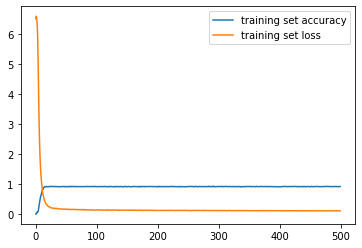

In [ ]:
#merencanakan akurasi model

plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

<h2> Testing </h2>

Kami telah menguji model dengan cara meniru interaksi manusia dengan bot dan mendapatkan hasil yang positif. Namun, bot ini sangat sederhana karena jumlah data yang kami buat cukup kecil. Tapi, model yang sama juga dapat digunakan dengan jumlah besar data yang lebih besar dengan pertanyaan yang lebih kompleks


In [ ]:
#chatting
import random


while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()

  #finding the right tag and predicting
  response_tag = le.inverse_transform([output])[0]
  print("Baskara Borobudur Esa : ",random.choice(responses[response_tag]))
  if response_tag == "goodbye":
    break

Baskara Borobudur Esa :  Bye
Baskara Borobudur Esa :  Halo?
Baskara Borobudur Esa :  Baik


In [ ]:
from tensorflow import keras

model.save('.../content/my_model/saved50_model.pb', include_optimizer=False, save_format='h5f')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/my_model/saved50_model.pb')

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

In [ ]:
loss, acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100*acc))

<h2> Conclusion </h2>
So, This is the Chatbot that I have created with tensorflow2 utilizing the power of embedding matrix.<br>
This was created in memory og <b> Going Merry </b> , a ship from a manga called "One Piece" which revolves around the story of 5 pirates. 